In [2]:
import pandas as pd

### Overview of the data

In [3]:
patients = pd.read_csv("../data/raw/train.csv")
#patients.head()
patients.info()

C:\Users\svetl\AppData\Local\Temp\ipykernel_10852\3254964731.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  patients = pd.read_csv("../data/raw/train.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Columns: 508 entries, id to bg+1:00
dtypes: float64(433), object(75)
memory usage: 686.1+ MB


In [48]:
patients['p_num'].unique()

array(['p01', 'p02', 'p03', 'p04', 'p05', 'p06', 'p10', 'p11', 'p12'],
      dtype=object)

### Percentage of missing values for bg-cols 

In [21]:
bg_cols = [col for col in patients.columns if col.startswith('bg-')]
# Calculate the percentage of missing values for each 'bg-' column
missing_percentage = patients[bg_cols].isnull().mean() * 100
print(min(missing_percentage), max(missing_percentage))

1.5229573391178597 15.399606832971802


In [97]:
missing_percentage = patients[bg_cols].isna().sum().sum() / patients[bg_cols].size * 100
missing_percentage

np.float64(10.761911755844782)

### Percentage of missing values for insulin-cols 

In [22]:
insulin_cols = [col for col in patients.columns if col.startswith('insulin-')]
# Calculate the percentage of missing values for each 'insulin-' column
missing_percentage = patients[insulin_cols].isnull().mean() * 100
print(min(missing_percentage), max(missing_percentage))

5.295892082429502 5.335999638467101


In [98]:
missing_percentage = patients[insulin_cols].isna().sum().sum() / patients[insulin_cols].size * 100
missing_percentage

np.float64(5.3159458604483)

### Percentage of missing values for carbs-cols

In [23]:
carbs_cols = [col for col in patients.columns if col.startswith('carbs-')]
# Calculate the percentage of missing values for each 'carbs-' column
missing_percentage = patients[carbs_cols].isnull().mean() * 100
print(min(missing_percentage), max(missing_percentage))

98.53918112798264 98.57194504699928


In [99]:
missing_percentage = patients[carbs_cols].isna().sum().sum() / patients[carbs_cols].size * 100
missing_percentage

np.float64(98.55736761368202)

### Percentage of missing values for hr-cols

In [24]:
hr_cols = [col for col in patients.columns if col.startswith('hr-')]
# Calculate the percentage of missing values for each 'hr-' column
missing_percentage = patients[hr_cols].isnull().mean() * 100
print(min(missing_percentage), max(missing_percentage))

28.885348879248014 29.272302060737527


In [100]:
missing_percentage = patients[hr_cols].isna().sum().sum() / patients[hr_cols].size * 100
missing_percentage

np.float64(29.10068377420262)

### Percentage of missing values for steps-cols

In [25]:
steps_cols = [col for col in patients.columns if col.startswith('steps-')]
# Calculate the percentage of missing values for each 'steps-' column
missing_percentage = patients[steps_cols].isnull().mean() * 100
print(min(missing_percentage), max(missing_percentage))

53.66165039768619 54.055382321041215


In [101]:
missing_percentage = patients[steps_cols].isna().sum().sum() / patients[steps_cols].size * 100
missing_percentage

np.float64(53.87635763135695)

### Percentage of missing values for cals-cols

In [26]:
cals_cols = [col for col in patients.columns if col.startswith('cals-')]
# Calculate the percentage of missing values for each 'cals-' column
missing_percentage = patients[cals_cols].isnull().mean() * 100
print(min(missing_percentage), max(missing_percentage))

19.916508496023138 20.231155097613883


In [102]:
missing_percentage = patients[cals_cols].isna().sum().sum() / patients[cals_cols].size * 100
missing_percentage

np.float64(20.07893939051579)

### Percentage of missing values for activity-cols

In [27]:
activity_cols = [col for col in patients.columns if col.startswith('activity-')]
# Calculate the percentage of missing values for each 'activity-' column
missing_percentage = patients[activity_cols].isnull().mean() * 100
print(min(missing_percentage), max(missing_percentage))

# Initialize an empty set to store unique activities (using set to avoid duplicates)
unique_activities = set()
for col in activity_cols:
    unique_activities.update(patients[col].dropna().unique())  
unique_activities_list = list(unique_activities)
print(unique_activities_list)

98.43411062906723 98.46800433839479
['Walk', 'Walking', 'Run', 'Zumba', 'Aerobic Workout', 'HIIT', 'Swim', 'Sport', 'Outdoor Bike', 'Workout', 'Hike', 'Tennis', 'Spinning', 'Weights', 'Stairclimber', 'Running', 'Indoor climbing', 'Dancing', 'Strength training', 'Bike', 'Yoga', 'Swimming']


In [103]:
missing_percentage = patients[activity_cols].isna().sum().sum() / patients[activity_cols].size * 100
missing_percentage

np.float64(98.45232065206476)

### Percentage of reported activities for each patient

In [40]:
# find the "busiest" patient, i.e. the one who reported the most activities across the activity- columns
# Step 1: Count non-missing values in the 'activity-' columns for each patient
activity_counts = patients.groupby('p_num')[activity_cols].apply(lambda x: x.notnull().sum().sum())

# Step 2: Find the patient with the maximum activity reports
busiest_patient = activity_counts.idxmax()
max_activities_reported = activity_counts.max()

# Step 3: Output the result
print(f"The busiest patient is {busiest_patient} with {max_activities_reported} reported activities.")

# Note: this is the highest absolute number of activity entries 

The busiest patient is p10 with 65952 reported activities.


In [41]:
# Step 1: Count non-missing values in the 'activity-' columns for each patient
activity_counts = patients.groupby('p_num')[activity_cols].apply(lambda x: x.notnull().sum().sum())

# Step 2: Calculate the total possible activity entries for each patient
total_possible_activities = len(activity_cols) * patients.groupby('p_num').size()

# Step 3: Calculate the percentage of filled activity data for each patient
activity_percentage_filled = (activity_counts / total_possible_activities) * 100

# Display the percentage for each patient
print(activity_percentage_filled)

# Note: this is the highest percentage of filled activity data, which suggests that a higher proportion of the total data available 
# for this patient is filled in, even if the absolute number of activity records is lower.


p_num
p01    3.935650
p02    0.935857
p03    0.430306
p04    1.124625
p05    1.233879
p06    2.589401
p10    3.598649
p11    1.884432
p12    0.304525
dtype: float64


### Percentage of missing values for the target bg+1:00

In [42]:
missing_percentage = patients['bg+1:00'].isna().sum() / len(patients) * 100
missing_percentage

np.float64(0.0)

## Outliers / extreme values analysis

### Outliers for bg-cols

In [49]:
patients[bg_cols].describe()

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00
count,149770.000000,158533.000000,163364.000000,149766.000000,158254.000000,163770.000000,149763.000000,157973.000000,164174.000000,149771.000000,157677.000000,164585.000000,149780.000000,157381.000000,164995.000000,149800.000000,157087.000000,165418.000000,149819.000000,156784.000000,165834.000000,149831.000000,156476.000000,166260.00000,149849.000000,156177.000000,166684.000000,149877.000000,155887.000000,167124.000000,149918.000000,155604.000000,167575.000000,149964.000000,155322.000000,168030.00000,150011.000000,155037.000000,168487.000000,150061.000000,154757.000000,168952.000000,150118.000000,154488.000000,169419.000000,150183.000000,154220.000000,169902.000000,150259.000000,153957.000000,170395.000000,150339.000000,153706.000000,170899.000000,150431.000000,153463.000000,171422.000000,150544.000000,153251.000000,171967.000000,150695.000000,153076.000000,172565.000000,150859.000000,152906.000000,173160.000000,151028.000000,152743.000000,173752.000000,151202.000000,152586.000000,174328.000000
mean,8.211018,8.230449,8.253291,8.210988,8.229649,8.254083,8.211049,8.228888,8.254602,8.211000,8.228350,8.255273,8.211187,8.228395,8.256113,8.211492,8.228119,8.256776,8.211555,8.227941,8.257407,8.211550,8.227752,8.25822,8.211743,8.227548,8.259532,8.212123,8.227183,8.260976,8.212331,8.226789,8.262528,8.212834,8.226376,8.26418,8.213568,8.226231,8.265710,8.214246,8.225972,8.267317,8.214785,8.225567,8.268805,8.215397,8.225077,8.270206,8.215739,8.224398,8.271831,8.216318,8.223764,8.273527,8.216906,8.223213,8.274844,8.217199,8.222413,8.275798,8.217503,8.221383,8.276668,8.217483,8.220633,8.277074,8.217376,8.219903,8.277226,8.217047,8.218819,8.277378
std,2.852188,2.913438,2.945594,2.852090,2.911313,2.947651,2.852212,2.909304,2.949689,2.852315,2.907124,2.951804,2.852184,2.904586,2.954168,2.852085,2.902274,2.956386,2.852075,2.900141,2.958584,2.852396,2.898357,2.96091,2.852594,2.896473,2.962944,2.852697,2.894691,2.964921,2.852872,2.892550,2.966625,2.852634,2.889888,2.96861,2.852659,2.887842,2.970579,2.852778,2.885626,2.972569,2.852803,2.883120,2.973936,2.852523,2.880415,2.975518,2.852323,2.877939,2.977090,2.852174,2.875558,2.978996,2.852575,2.873341,2.981263,2.853128,2.871447,2.983289,2.853587,2.869206,2.985219,2.853859,2.866984,2.986846,2.854054,2.864910,2.988465,2.854402,2.863166,2.990266
min,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.20000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.20000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000
25%,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.10000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.10000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.200000,6.100000,6.100000,6.200000,6.100000,6.100000

In [30]:
# Get the describe() result for all 'bg-*' columns
df_bg = patients[bg_cols].describe()

# Extract the minimum and maximum values across all bg-* columns
overall_min = df_bg.loc['min'].min()  # Get the smallest 'min' value across all bg-* columns
overall_max = df_bg.loc['max'].max()  # Get the largest 'max' value across all bg-* columns

# Display the results
print(f"Overall minimum value across all bg-* columns: {overall_min}")
print(f"Overall maximum value across all bg-* columns: {overall_max}")


Overall minimum value across all bg-* columns: 2.2
Overall maximum value across all bg-* columns: 27.8


In [53]:
patients.groupby('p_num')['bg-5:45'].agg(['min', 'max'])

,min,max
p_num,,
p01,2.3,27.8
p02,2.2,22.2
p03,2.2,22.2
p04,2.2,18.4
p05,2.9,20.6
p06,2.9,27.8
p10,2.2,15.9
p11,2.2,20.8
p12,2.8,22.2


> <b>Summary</b>: There are some extreme values for blood glucose present but still realistic for some patients.

### Outliers for insulin-cols

In [57]:
# Get the describe() result for all 'insulin-*' columns
df_insulin = patients[insulin_cols].describe()

# Extract the minimum and maximum values across all insulin-* columns
overall_min = df_insulin.loc['min'].min() 
overall_max = df_insulin.loc['max'].max()  

# Display the results
print(f"Overall minimum value across all insulin-* columns: {overall_min}")
print(f"Overall maximum value across all insulin-* columns: {overall_max}")


Overall minimum value across all insulin-* columns: -0.3078
Overall maximum value across all insulin-* columns: 46.311


<b>a) Investigating negative insulin</b>

In [ ]:
(patients[insulin_cols] < 0).groupby(patients['p_num']).sum()  # result: only p12 has some negativ values

In [74]:
# Create an empty list to store unique negative values
unique_negative_values = set()

# Iterate through each insulin column and patient 'p12'
for col in insulin_cols:
    negative_values = patients[(patients['p_num'] == 'p12') & (patients[col] < 0)][col]
    
    # Add the negative values to the set (automatically handles uniqueness)
    unique_negative_values.update(negative_values.dropna())

# Convert the set to a sorted list and display
unique_negative_values = sorted(unique_negative_values)
print(unique_negative_values)



[-0.3078, -0.059]


<b>a) Investigating positiv extremes</b>

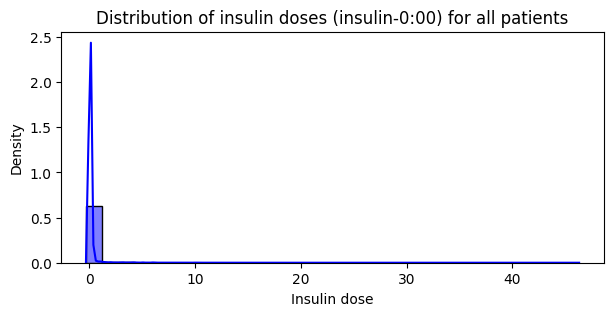

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

insulin_values = patients["insulin-0:00"].dropna()

# Create a figure for the histogram and KDE plot
plt.figure(figsize=(7, 3))

sns.histplot(insulin_values, bins=30, kde=True, color='blue', stat='density')

# Add labels and title
plt.xlabel('Insulin dose')
plt.ylabel('Density')
plt.title('Distribution of insulin doses (insulin-0:00) for all patients')

plt.show()

In [78]:
patients.groupby('p_num')['insulin-0:00'].agg(['min', 'max'])

,min,max
p_num,,
p01,0.0000,11.7417
p02,0.0000,18.0833
p03,0.0000,46.3110
p04,0.0000,42.7800
p05,0.0000,8.1542
p06,0.0000,14.1833
p10,0.0000,9.0833
p11,0.0000,12.4167
p12,-0.3078,25.3500


> <b>Summary:</b> For patient p12 we can detect some negativ values. Negative insulin values are often a result of data entry errors, sensor malfunctions or recording issues in the dataset.
> As there are only 2 different negativ values and based on the usual value ranges in the data, we can replayce them by the same positiv number.
>
> For 2 patients we see extremely high insulin doses but those seem to be no errors. We still have to deal with a right-skewed data.

### Outliers for carbs-cols

In [80]:
# Get the describe() result for all 'carbs-*' columns
df_carbs = patients[carbs_cols].describe()

# Extract the minimum and maximum values across all hr-* columns
overall_min = df_carbs.loc['min'].min() 
overall_max = df_carbs.loc['max'].max() 

# Display the results
print(f"Overall minimum value across all carbs-* columns: {overall_min}")
print(f"Overall maximum value across all carbs-* columns: {overall_max}")


Overall minimum value across all carbs-* columns: 1.0
Overall maximum value across all carbs-* columns: 852.0


> <b>Summary:</b> The values we're seeing for carbohydrate consumption - ranging from 1.0 to 852.0 grams — raise a question about their
realism and appropriateness in our use-case. Considering the fact that these data has been recorded by the patients themselves and 98% of those data is missing, we could exclude this columns from the model.

### Outliers for hr-cols

In [18]:
# Get the describe() result for all 'hr-*' columns
df_hr = patients[hr_cols].describe()

# Extract the minimum and maximum values across all hr-* columns
overall_min = df_hr.loc['min'].min()  # Get the smallest 'min' value across all hr-* columns
overall_max = df_hr.loc['max'].max()  # Get the largest 'max' value across all hr-* columns

# Display the results
print(f"Overall minimum value across all hr-* columns: {overall_min}")
print(f"Overall maximum value across all hr-* columns: {overall_max}")


Overall minimum value across all hr-* columns: 37.6
Overall maximum value across all hr-* columns: 185.3


In [ ]:
# Calculate lower and upper bounds based on percentiles
lower_bound = patients[hr_cols].quantile(0.01)  # 1st percentile
upper_bound = patients[hr_cols].quantile(0.99)  # 99th percentile

# Flag outliers based on percentile method
outliers_percentile = patients[(patients[hr_cols] < lower_bound) | (patients[hr_cols] > upper_bound)]

# Display the results
print("Lower bound based on 1st percentile:\n", lower_bound)
print("Upper bound based on 99th percentile:\n", upper_bound)


In [42]:
patients[patients['hr-5:55'] == 37.6]

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,bg-5:05,bg-5:00,bg-4:55,bg-4:50,bg-4:45,bg-4:40,bg-4:35,bg-4:30,bg-4:25,bg-4:20,bg-4:15,bg-4:10,bg-4:05,bg-4:00,bg-3:55,bg-3:50,bg-3:45,bg-3:40,bg-3:35,bg-3:30,bg-3:25,bg-3:20,bg-3:15,bg-3:10,bg-3:05,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,bg-2:10,bg-2:05,bg-2:00,bg-1:55,bg-1:50,bg-1:45,bg-1:40,bg-1:35,bg-1:30,bg-1:25,bg-1:20,bg-1:15,bg-1:10,bg-1:05,bg-1:00,bg-0:55,bg-0:50,bg-0:45,bg-0:40,bg-0:35,bg-0:30,bg-0:25,bg-0:20,bg-0:15,bg-0:10,bg-0:05,bg-0:00,insulin-5:55,insulin-5:50,insulin-5:45,insulin-5:40,insulin-5:35,insulin-5:30,insulin-5:25,insulin-5:20,insulin-5:15,insulin-5:10,insulin-5:05,insulin-5:00,insulin-4:55,insulin-4:50,insulin-4:45,insulin-4:40,insulin-4:35,insulin-4:30,insulin-4:25,insulin-4:20,insulin-4:15,insulin-4:10,insulin-4:05,insulin-4:00,insulin-3:55,insulin-3:50,insulin-3:45,insulin-3:40,insulin-3:35,insulin-3:30,insulin-3:25,insulin-3:20,insulin-3:15,insulin-3:10,insulin-3:05,insulin-3:00,insulin-2:55,insulin-2:50,insulin-2:45,insulin-2:40,insulin-2:35,insulin-2:30,insulin-2:25,insulin-2:20,insulin-2:15,insulin-2:10,insulin-2:05,insulin-2:00,insulin-1:55,insulin-1:50,insulin-1:45,insulin-1:40,insulin-1:35,insulin-1:30,insulin-1:25,insulin-1:20,insulin-1:15,insulin-1:10,insulin-1:05,insulin-1:00,insulin-0:55,insulin-0:50,insulin-0:45,insulin-0:40,insulin-0:35,insulin-0:30,insulin-0:25,insulin-0:20,insulin-0:15,insulin-0:10,insulin-0:05,insulin-0:00,carbs-5:55,carbs-5:50,carbs-5:45,carbs-5:40,carbs-5:35,carbs-5:30,carbs-5:25,carbs-5:20,carbs-5:15,carbs-5:10,carbs-5:05,carbs-5:00,carbs-4:55,carbs-4:50,carbs-4:45,carbs-4:40,carbs-4:35,carbs-4:30,carbs-4:25,carbs-4:20,carbs-4:15,carbs-4:10,carbs-4:05,carbs-4:00,carbs-3:55,carbs-3:50,carbs-3:45,carbs-3:40,carbs-3:35,carbs-3:30,carbs-3:25,carbs-3:20,carbs-3:15,carbs-3:10,carbs-3:05,carbs-3:00,carbs-2:55,carbs-2:50,carbs-2:45,carbs-2:40,carbs-2:35,carbs-2:30,carbs-2:25,carbs-2:20,carbs-2:15,carbs-2:10,carbs-2:05,carbs-2:00,carbs-1:55,carbs-1:50,carbs-1:45,carbs-1:40,carbs-1:35,carbs-1:30,carbs-1:25,carbs-1:20,carbs-1:15,carbs-1:10,carbs-1:05,carbs-1:00,carbs-0:55,carbs-0:50,carbs-0:45,carbs-0:40,carbs-0:35,carbs-0:30,carbs-0:25,carbs-0:20,carbs-0:15,carbs-0:10,carbs-0:05,carbs-0:00,hr-5:55,hr-5:50,hr-5:45,hr-5:40,hr-5:35,hr-5:30,hr-5:25,hr-5:20,hr-5:15,hr-5:10,hr-5:05,hr-5:00,hr-4:55,hr-4:50,hr-4:45,hr-4:40,hr-4:35,hr-4:30,hr-4:25,hr-4:20,hr-4:15,hr-4:10,hr-4:05,hr-4:00,hr-3:55,hr-3:50,hr-3:45,hr-3:40,hr-3:35,hr-3:30,hr-3:25,hr-3:20,hr-3:15,hr-3:10,hr-3:05,hr-3:00,hr-2:55,hr-2:50,hr-2:45,hr-2:40,hr-2:35,hr-2:30,hr-2:25,hr-2:20,hr-2:15,hr-2:10,hr-2:05,hr-2:00,hr-1:55,hr-1:50,hr-1:45,hr-1:40,hr-1:35,hr-1:30,hr-1:25,hr-1:20,hr-1:15,hr-1:10,hr-1:05,hr-1:00,hr-0:55,hr-0:50,hr-0:45,hr-0:40,hr-0:35,hr-0:30,hr-0:25,hr-0:20,hr-0:15,hr-0:10,hr-0:05,hr-0:00,steps-5:55,steps-5:50,steps-5:45,steps-5:40,steps-5:35,steps-5:30,steps-5:25,steps-5:20,steps-5:15,steps-5:10,steps-5:05,steps-5:00,steps-4:55,steps-4:50,steps-4:45,steps-4:40,steps-4:35,steps-4:30,steps-4:25,steps-4:20,steps-4:15,steps-4:10,steps-4:05,steps-4:00,steps-3:55,steps-3:50,steps-3:45,steps-3:40,steps-3:35,steps-3:30,steps-3:25,steps-3:20,steps-3:15,steps-3:10,steps-3:05,steps-3:00,steps-2:55,steps-2:50,steps-2:45,steps-2:40,steps-2:35,steps-2:30,steps-2:25,steps-2:20,steps-2:15,steps-2:10,steps-2:05,steps-2:00,steps-1:55,steps-1:50,steps-1:45,steps-1:40,steps-1:35,steps-1:30,steps-1:25,steps-1:20,steps-1:15,steps-1:10,steps-1:05,steps-1:00,steps-0:55,steps-0:50,steps-0:45,steps-0:40,steps-0:35,steps-0:30,steps-0:25,steps-0:20,steps-0:15,steps-0:10,steps-0:05,steps-0:00,cals-5:55,cals-5:50,cals-5:45,cals-5:40,cals-5:35,cals-5:30,cals-5:25,cals-5:20,cals-5:15,cals-5:10,cals-5:05,cals-5:00,cals-4:55,cals-4:50,cals-4:45,cals-4:40,cals-4:35,cals-4:30,cals-4:25,cals-4:20,cals-4:15,cals-4:10,cals-4:05,cals-4:00,cals-3:55,cals-3:50,cals-3:45,cals-3:40,cals-3:35,cals-3:30,cals-3:25,cal

In [46]:
# Group by 'p_num' and calculate the min and max of 'hr-5:55' for each patient
patients.groupby('p_num')['hr-5:55'].agg(['min', 'max'])


,min,max
p_num,,
p01,47.3,163.8
p02,40.0,185.3
p03,47.2,156.8
p04,50.7,164.4
p05,43.9,158.2
p06,37.6,155.1
p10,47.4,184.2
p11,49.7,164.8
p12,49.7,136.6


> <b>Summary:</b>
> For 1 patient (p06) we can observe untypically low hr value. While 37.6 bpm can be realistic for elite athletes or during deep sleep, it is quite low and would generally be considered abnormally low for most people.
> For now, we'll leave it as it is as it might be an important clinical signal (severe bradycardia) untill we decide to perform a log transformation of the whole data. However, we should be aware that in a small dataset of only 9 patients, even one outlier can have a larger impact than in larger datasets. If we'll apply models like random forests, gradient boosting or SVM, which are more robust to outliers, the outlier might have minimal impact.
>
> Same consideration is valid for the extreme value 185.3 bpm for p02.
>
> *Note:* The most common IQR method for outliers detection isn't applicable in this case because we have to deal with skewed data.

In [ ]:
# Detect outliers using the IQR method
outliers = {}

for col in hr_cols: # or any other columns
    Q1 = patients[col].quantile(0.25)
    Q3 = patients[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("lower bound:", lower_bound, "; upper bound:", upper_bound)
    # Get outliers
    outliers[col] = patients[(patients[col] < lower_bound) | (patients[col] > upper_bound)][col]
    
# Display outliers
for col, outlier_values in outliers.items():
    print(f"Outliers in {col}:")
    ("min oulier:", outlier_values.min(), "max outlier:", outlier_values.max())
    #print(outlier_values)

### Outliers for steps-cols

In [84]:
# Get the describe() result for all 'steps-*' columns
df_steps = patients[steps_cols].describe()

# Extract the minimum and maximum values across all steps-* columns
overall_min = df_steps.loc['min'].min()  
overall_max = df_steps.loc['max'].max() 

# Display the results
print(f"Overall minimum value across all steps-* columns: {overall_min}")
print(f"Overall maximum value across all steps-* columns: {overall_max}")


Overall minimum value across all steps-* columns: 0.0
Overall maximum value across all steps-* columns: 1359.0


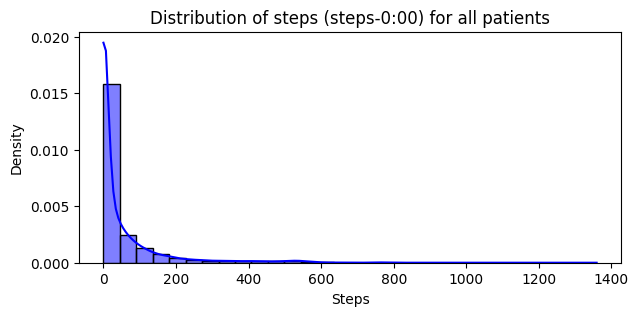

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

steps_values = patients["steps-0:00"].dropna()

# Create a figure for the histogram and KDE plot
plt.figure(figsize=(7, 3))

sns.histplot(steps_values, bins=30, kde=True, color='blue', stat='density')

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Density')
plt.title('Distribution of steps (steps-0:00) for all patients')

plt.show()

In [85]:
# Group by 'p_num' and calculate the min and max of 'steps-0:00' for each patient
patients.groupby('p_num')['steps-0:00'].agg(['min', 'max'])

,min,max
p_num,,
p01,0.0,741.0
p02,1.0,1359.0
p03,0.0,582.0
p04,0.0,673.0
p05,0.0,660.0
p06,0.0,627.0
p10,0.0,783.0
p11,0.0,660.0
p12,0.0,567.0


In [87]:
# Create an empty list to store unique values
unique_extremes = set()

for col in steps_cols:
    extremes = patients[(patients['p_num'] == 'p02') & (patients[col] > 700)][col]
    
    unique_extremes.update(extremes.dropna())

# Convert the set to a sorted list and display
unique_extremes = sorted(unique_extremes)
print(unique_extremes)

[701.0, 704.0, 713.0, 717.0, 726.0, 737.0, 739.0, 749.0, 752.0, 754.0, 759.0, 761.0, 762.0, 765.0, 766.0, 767.0, 770.0, 771.0, 775.0, 776.0, 788.0, 800.0, 812.0, 814.0, 824.0, 825.0, 829.0, 840.0, 847.0, 848.0, 854.0, 856.0, 859.0, 860.0, 864.0, 866.0, 871.0, 874.0, 876.0, 881.0, 887.0, 889.0, 897.0, 899.0, 901.0, 903.0, 912.0, 923.0, 925.0, 927.0, 928.0, 929.0, 931.0, 936.0, 943.0, 955.0, 966.0, 977.0, 979.0, 988.0, 990.0, 992.0, 998.0, 1008.0, 1010.0, 1012.0, 1013.0, 1016.0, 1017.0, 1022.0, 1026.0, 1038.0, 1041.0, 1042.0, 1044.0, 1046.0, 1048.0, 1056.0, 1064.0, 1075.0, 1097.0, 1098.0, 1106.0, 1115.0, 1121.0, 1127.0, 1130.0, 1132.0, 1138.0, 1175.0, 1205.0, 1208.0, 1229.0, 1238.0, 1239.0, 1258.0, 1272.0, 1283.0, 1303.0, 1330.0, 1358.0, 1359.0]


In [88]:
# Filter the dataset for patient 'p02' where 'steps-0:00' equals 1359
activity_steps_1359_p02 = patients[(patients['p_num'] == 'p02') & (patients['steps-0:00'] == 1359)][['activity-0:00', 'steps-0:00']]

# Display the result
print(activity_steps_1359_p02)


      activity-0:00  steps-0:00
19127       Walking      1359.0


In [93]:
patients[(patients['p_num'] == 'p02') & (patients['steps-0:00'] == 1359)][steps_cols + activity_cols]


,steps-5:55,steps-5:50,steps-5:45,steps-5:40,steps-5:35,steps-5:30,steps-5:25,steps-5:20,steps-5:15,steps-5:10,steps-5:05,steps-5:00,steps-4:55,steps-4:50,steps-4:45,steps-4:40,steps-4:35,steps-4:30,steps-4:25,steps-4:20,steps-4:15,steps-4:10,steps-4:05,steps-4:00,steps-3:55,steps-3:50,steps-3:45,steps-3:40,steps-3:35,steps-3:30,steps-3:25,steps-3:20,steps-3:15,steps-3:10,steps-3:05,steps-3:00,steps-2:55,steps-2:50,steps-2:45,steps-2:40,steps-2:35,steps-2:30,steps-2:25,steps-2:20,steps-2:15,steps-2:10,steps-2:05,steps-2:00,steps-1:55,steps-1:50,steps-1:45,steps-1:40,steps-1:35,steps-1:30,steps-1:25,steps-1:20,steps-1:15,steps-1:10,steps-1:05,steps-1:00,steps-0:55,steps-0:50,steps-0:45,steps-0:40,steps-0:35,steps-0:30,steps-0:25,steps-0:20,steps-0:15,steps-0:10,steps-0:05,steps-0:00,activity-5:55,activity-5:50,activity-5:45,activity-5:40,activity-5:35,activity-5:30,activity-5:25,activity-5:20,activity-5:15,activity-5:10,activity-5:05,activity-5:00,activity-4:55,activity-4:50,activity-4:45,activity-4:40,activity-4:35,activity-4:30,activity-4:25,activity-4:20,activity-4:15,activity-4:10,activity-4:05,activity-4:00,activity-3:55,activity-3:50,activity-3:45,activity-3:40,activity-3:35,activity-3:30,activity-3:25,activity-3:20,activity-3:15,activity-3:10,activity-3:05,activity-3:00,activity-2:55,activity-2:50,activity-2:45,activity-2:40,activity-2:35,activity-2:30,activity-2:25,activity-2:20,activity-2:15,activity-2:10,activity-2:05,activity-2:00,activity-1:55,activity-1:50,activity-1:45,activity-1:40,activity-1:35,activity-1:30,activity-1:25,activity-1:20,activity-1:15,activity-1:10,activity-1:05,activity-1:00,activity-0:55,activity-0:50,activity-0:45,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00
19127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,91.0,NaN,NaN,18.0,NaN,NaN,NaN,17.0,191.0,NaN,717.0,213.0,NaN,1013.0,NaN,1283.0,358.0,NaN,564.0,NaN,936.0,325.0,456.0,69.0,NaN,567.0,NaN,1132.0,348.0,NaN,897.0,NaN,477.0,20.0,8.0,396.0,NaN,848.0,NaN,1026.0,430.0,NaN,1041.0,96.0,NaN,1175.0,362.0,NaN,1038.0,143.0,NaN,1359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking,Walking


><b>Summary:</b> Average walking speed for a healthy adult is around 100 to 120 steps per minute. Over 5 minutes, a typical person would walk about 500 to 600 steps at a moderate pace. Therefore, a value of 1359 looks like an outlier or extreme value. However, looking at the frequency and tendency of the neighbours, and verified that the affected record reported 'Walking' as Activity, we could conclude that they are likely valid given the context of possible intense physical activity.

### Outliers for cals-cols

In [94]:
# Get the describe() result for all 'cals-*' columns
df_cals = patients[cals_cols].describe()

# Extract the minimum and maximum values across all steps-* columns
overall_min = df_cals.loc['min'].min()  
overall_max = df_cals.loc['max'].max() 

# Display the results
print(f"Overall minimum value across all cals-* columns: {overall_min}")
print(f"Overall maximum value across all cals-* columns: {overall_max}")

Overall minimum value across all cals-* columns: 0.03
Overall maximum value across all cals-* columns: 116.1


><b>Summary:</b> Values, observed here, look realistic considering potential physical activities.